In [1]:
# generate future y values using past x values AND greater offset y values 

In [2]:
import pandas as pd
import numpy as np
import os
import shutil
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as plt
import re

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV



from sklearn.preprocessing import MinMaxScaler


from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline

from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error, mean_absolute_error



from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dropout
from scikeras.wrappers import KerasRegressor


import pickle


In [3]:

def convert_to_dataframe(x):
    return pd.DataFrame(x)


In [4]:
def create_sequences(features, target, seq_length, y_offset):
    X, y = [], []
    for i in range(seq_length, len(features)):
        # Current features sequence
        current_features = features[i-seq_length:i]
        
        # Offset previous y values sequence
        if i - seq_length - y_offset >= 0:
            offset_prev_y = target[i-seq_length-y_offset:i-y_offset]
        else:
            # If the offset is larger than the available data, fill with zeros or appropriate value
            offset_prev_y = np.zeros((seq_length, 1))
        
        # Combine current features with offset previous y values
        combined = np.hstack((current_features, offset_prev_y))
        
        X.append(combined)
        y.append(target[i])
    
    return np.array(X), np.array(y)



In [5]:
def predict_future(model, data, seq_length, future_steps):
    future_predictions = []
    current_sequence = data[-seq_length:].reshape(1, seq_length, data.shape[1])
    
    return(current_sequence)

In [6]:
df = pd.read_csv(r'C:\Users\whiter04\OneDrive - Johnson Matthey\00. cspark\ELY\ELY-TimeSeries\Data\master_data_frame.csv')
df_copy = df.copy()
df_copy = df_copy.drop('Unnamed: 0',axis=1) 
df_copy


to_drop = ['temp_anode_inlet_set', 
           'temp_cathode_inlet_set', 
           'pressure_anode_set',
           'pressure_cathode_set', 
           'flow_anode_di_water_supply_set', 
           'flow_cathode_di_water_supply_set', 
          'flow_cathode_di_water_supply', 
           'signal_in_o2_in_h2_sensor']

df_copy = df_copy.drop(to_drop, axis=1)
df_copy


df_copy['seconds'] = (df_copy['time_running_total']/1000).astype(int)
df_copy['minutes'] = (df_copy['seconds']/60).astype(int)

# df_copy['hours'] = (df_copy['minutes']/60).astype(int)
# df_copy['days'] = (df_copy['hours']/24).astype(int)
# df_copy['weeks'] = (df_copy['days']/7).astype(int)
df_copy = df_copy.drop('time_running_total',axis=1)

# df_copy = df_copy.tail(150000)
df_copy

,cell_voltage_001,current,current_density,temp_anode_inlet,temp_anode_outlet,temp_cathode_inlet,temp_cathode_outlet,pressure_anode_inlet,pressure_anode_outlet,pressure_cathode_inlet,pressure_cathode_outlet,flow_anode_di_water_supply,signal_in_resistivity_anode,signal_in_resistivity_cathode,signal_in_h2_in_o2_sensor,seconds,minutes
0,-0.095167,-0.01262,-0.000505,22.524658,22.211363,22.943993,22.664978,0.015911,-0.026205,-0.009285,-0.009439,0.149858,0.142337,0.580925,0.278146,0,0
1,-0.095167,-0.01262,-0.000505,22.524658,22.211363,22.943993,22.664978,0.015911,-0.026205,-0.009285,-0.009439,0.149858,0.142337,0.580925,0.278146,0,0
2,-0.095167,-0.01262,-0.000505,22.524658,22.211363,22.943993,22.664978,0.015911,-0.026205,-0.009285,-0.009439,0.149858,0.142337,0.580925,0.278146,0,0
3,-0.095167,-0.01192,-0.000477,23.574999,22.622944,22.930300,22.651320,0.184089,-0.026205,-0.009285,-0.001021,0.270174,0.132591,0.585798,0.276583,30,0
4,-0.095167,-0.01192,-0.000477,23.574999,22.622944,22.930300,22.651320,0.184089,-0.026205,-0.009285,-0.001021,0.270174,0.132591,0.585798,0.276583,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461237,1.879790,75.00482,3.000193,79.819145,78.329117,29.627552,34.574463,1.992006,1.723834,6.002450,6.019177,0.300858,0.230055,0.152083,0.104703,4934550,82242
461238,1.879790,75.00482,3.000193,79.819145,78.329117,29.627552,34.574463,1.992006,1.723834,6.002450,6.019177,0.300858,0.230055,0.152083,0.104703,4934550,82242
461239,1.880171,75.00482,2.999912,79.819145,78.354111,29.627552,34.560806,1.992006,1.723834,6.002450,5.960248,0.300858,0.215435,0.156957,0.103140,4934580,82243
461240,1.880171,75.00482,2.999912,79.819145,78.354111,29.627552,34.560806,1.992006,1.723834,6.002450,5.960248,0.300858,0.215435,0.156957,0.103140,4934580,82243


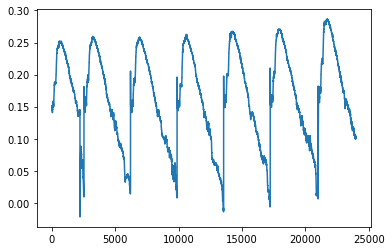

,cell_voltage_001,current,signal_in_h2_in_o2_sensor
minutes,,,
2024-06-24 08:37:00,1.863963,74.997810,0.145329
2024-06-24 08:38:00,1.864345,75.001315,0.145329
2024-06-24 08:39:00,1.864345,74.997810,0.145329
2024-06-24 08:40:00,1.864154,74.997810,0.145329
2024-06-24 08:41:00,1.864345,75.001315,0.145329
...,...,...,...
2024-07-12 02:39:00,1.879218,74.993604,0.101265
2024-07-12 02:40:00,1.879294,75.000614,0.103140
2024-07-12 02:41:00,1.879599,74.996408,0.103140


In [7]:
import matplotlib.pyplot as plt

time_period = 'minutes'

df_time = df_copy.groupby(time_period).mean().reset_index()

downsampled_df = df_time.tail(24000).reset_index()

downsampled_df = downsampled_df[['minutes','cell_voltage_001','current','signal_in_h2_in_o2_sensor']]

downsampled_df[time_period] = pd.to_datetime('2024-05-16 00:00:00') + pd.to_timedelta(downsampled_df[time_period], unit='m')



plt.plot(downsampled_df['signal_in_h2_in_o2_sensor'])

plt.show()

downsampled_df = downsampled_df.set_index('minutes')
downsampled_df

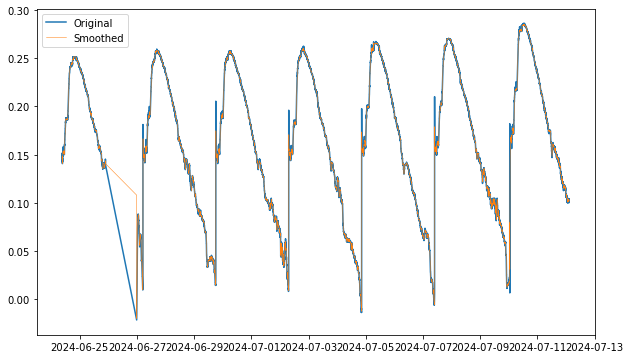

In [18]:


# feture engineering 

# adding trend to provide the model with increasing trend data

trend = (np.arange(len(downsampled_df))).tolist()
trend


downsampled_df['trend'] = trend
downsampled_df



# smoothing the data using a moving average

def moving_average(data, window=5):
    return data.rolling(window=window).mean()



downsampled_df['smoothed_value'] = moving_average(downsampled_df['signal_in_h2_in_o2_sensor'], window=5)

downsampled_df = downsampled_df.dropna()
downsampled_df


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(downsampled_df['signal_in_h2_in_o2_sensor'], label='Original')
plt.plot(downsampled_df['smoothed_value'], label='Smoothed', linewidth=0.5)
plt.legend()
plt.show()

In [20]:
# pipeline


pipeline = Pipeline([
    ('scaler', MinMaxScaler()),

])

# Fit and transform the data


features = downsampled_df.drop(columns= ['signal_in_h2_in_o2_sensor'])
target = downsampled_df['signal_in_h2_in_o2_sensor']


features_trans = pipeline.fit_transform(features)
target_trans = pipeline.fit_transform(pd.DataFrame(target))



seq_length = 3  # Using  to predict the next minute
y_offset = 3500
X, y = create_sequences(features_trans, target_trans, seq_length, y_offset)

In [21]:


train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]



In [ ]:
# Tuning of Hyperparameters 

In [23]:
import keras.backend as K
from keras.callbacks import EarlyStopping
import keras_tuner as kt
from tensorflow.keras.layers import Dropout
from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

In [28]:
# Define the directory to store tuner data
tuner_dir = 'my_dir/untitled_project'

# Clear the Keras session
K.clear_session()

# Delete the tuner directory if it exists
if os.path.exists(tuner_dir):
    shutil.rmtree(tuner_dir)


In [27]:
def create_model(hp):
    model = Sequential()
    
    model.add(LSTM(hp.Int('input_unit', min_value = 120, max_value = 120, step = 10),
                   return_sequences = True,
                   input_shape = (X_train.shape[1], X_train.shape[2])))


    model.add(Dropout(hp.Float('Dropout_rate_1', min_value=0.4, max_value=0.4, step=0.1)))


    for i in range(hp.Int('n_layers', 1, 3)):
        model.add(LSTM(hp.Int(f'lstm_{i}_units', min_value=90, max_value=150, step=10),
                      return_sequences=True if i < hp.Int('n_layers', 1, 10) - 1 else False))


    model.add(Dropout(hp.Float('Dropout_rate_2', min_value=0, max_value=0.5, step=0.1)))


    model.add(Dense(1))         
                           
    
    
    model.compile(optimizer='adam', loss = 'mean_squared_error', metrics = ['mse'])
    return model

In [29]:
tuner= kt.RandomSearch(
        create_model,
        objective='mse',
        max_trials=30,
        executions_per_trial=3,
        directory='.\hp_test_8',
        project_name='hp_9'
        )

In [30]:
tuner.search(
    x=X_train,
    y=y_train,
    epochs=20,
    batch_size=128,
    validation_data=(X_test, y_test),
    verbose=1
)

Trial 1 Complete [00h 06m 37s]
mse: 0.0007944964648534855

Best mse So Far: 0.0007944964648534855
Total elapsed time: 00h 06m 37s

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
120               |120               |input_unit
0.4               |0.4               |Dropout_rate_1
2                 |1                 |n_layers
130               |140               |lstm_0_units
0                 |0.1               |Dropout_rate_2

Epoch 1/20
 40/150 [=======>......................] - ETA: 5s - loss: 0.0998 - mse: 0.0998

KeyboardInterrupt: 

In [31]:
best_model = tuner.get_best_models(num_models=1)[0]

In [32]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

for param, value in best_hps.values.items():
    print(f"{param}: {value}")

input_unit: 120
Dropout_rate_1: 0.4
n_layers: 1
lstm_0_units: 140
Dropout_rate_2: 0.1


In [33]:
best_model.save('model_mse_0.00079-tredn-smooth.keras')

In [42]:
predictions = best_model.predict(X_test)


150/150 [==============================] - 1s 5ms/step


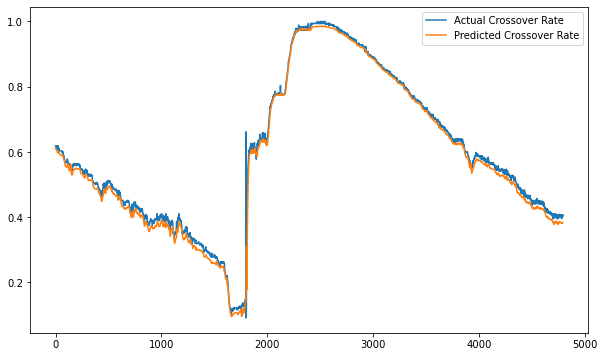

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Crossover Rate')
plt.plot(predictions, label='Predicted Crossover Rate')
plt.legend()
plt.show()

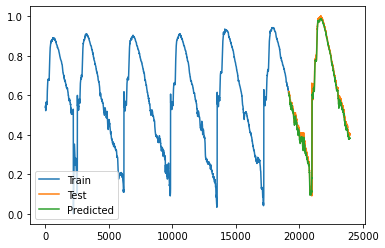

In [71]:
# Plot actual vs predicted value

plt.plot(range(len(predictions_train)), predictions_train, label='Train')
plt.plot(range(len(predictions_train), len(downsampled_df)-3), y_test, label='Test')
plt.plot(range(len(X_train), len(downsampled_df)-3), predictions, label='Predicted')
plt.legend()
plt.show()

In [36]:
predictions_train = best_model.predict(X_train)


600/600 [==============================] - 4s 6ms/step


In [74]:
pipeline.inverse_transform(predictions)

array([[0.16661678],
       [0.1663751 ],
       [0.16604973],
       ...,
       [0.09644718],
       [0.09638397],
       [0.09630668]], dtype=float32)